# Up-pooling and transpose-convolution

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from conv2d import Conv2D
from maxpool import MaxPool

### Import image

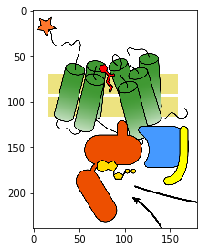

In [2]:
image = mpimg.imread('gpcr.png')
# remove alpha and make image smaller for faster execution
image = image[::4,::4,:3]
plt.imshow(image)
plt.show()

### Up-pool

In [3]:
def up_pool(data,step_size,kind='nearest',original=None):
    # get input data
    x,y,n = data.shape
    # generate output array
    uppool = np.zeros((x*step_size,y*step_size,n))
    # increase size
    for k in range(n):
        if (kind=='nearest'):
            # all cells are equal
            for i in range(x*step_size):
                for j in range(y*step_size):
                        uppool[i,j,k] = np.max(data[i//step_size,j//step_size,k])
        elif (kind=='nails'):
            # only the top left corner gets a value
            for i in range(x):
                for j in range(y):
                        uppool[i*step_size,j*step_size,k] = np.max(data[i,j,k])
        elif (kind=='coupled'):
            # reconstruct the same cell that was max in the original image, before pooling
            ox,oy,_ = original.shape
            for i in range(0,ox-ox%step_size,step_size):
                for j in range(0,oy-oy%step_size,step_size):
                    argmax = np.argmax(original[i:i+step_size,j:j+step_size,k])
                    (a, b) = np.unravel_index(argmax,(step_size,step_size))
                    uppool[i+a,j+b,k] = data[i//step_size,j//step_size,k]
    return uppool

In [4]:
# method for running the pooling and up-pooling, using the different options,
    # printing the shapes and images

def pool_uppool(p):
    # original image
    print(image.shape)

    pool = MaxPool(p)
    pooled = pool.feed_forward(image)
    # pooled
    print(pooled.shape)

    nearest = up_pool(pooled,p)
    # up-pooled using nearest neighboer
    print(nearest.shape)
    # up-pooled using bed-of-nails
    nails = up_pool(pooled,p,'nails')
    print(nails.shape)
    # up-pooled using positional bed-of-nails, based on the original pooling
    coupled = up_pool(pooled,p,'coupled',image)
    print(coupled.shape)

    fig,axes = plt.subplots(ncols=5, figsize=(18,18))

    axes[0].imshow(image)
    axes[0].set_title('original')
    axes[1].imshow(pooled)
    axes[1].set_title('pooled')
    axes[2].imshow(nearest)
    axes[2].set_title('nearest neighbor')
    axes[3].imshow(nails)
    axes[3].set_title('bed of nails')
    axes[4].imshow(coupled)
    axes[4].set_title('positional bed of nails')

    plt.show()

(239, 180, 3)
(119, 90, 3)
(238, 180, 3)
(238, 180, 3)
(238, 180, 3)


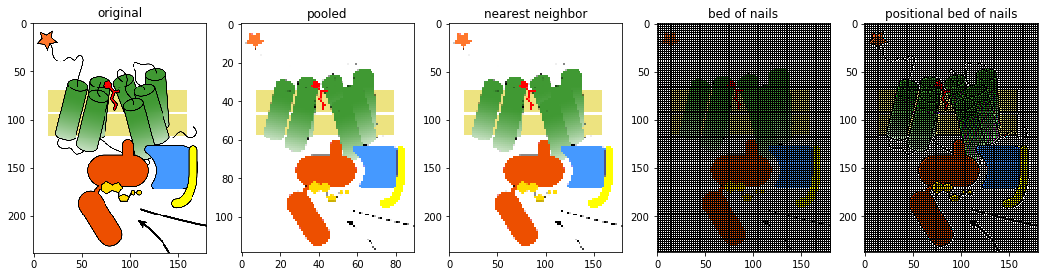

In [5]:
pool_uppool(2)

(239, 180, 3)
(47, 36, 3)
(235, 180, 3)
(235, 180, 3)
(235, 180, 3)


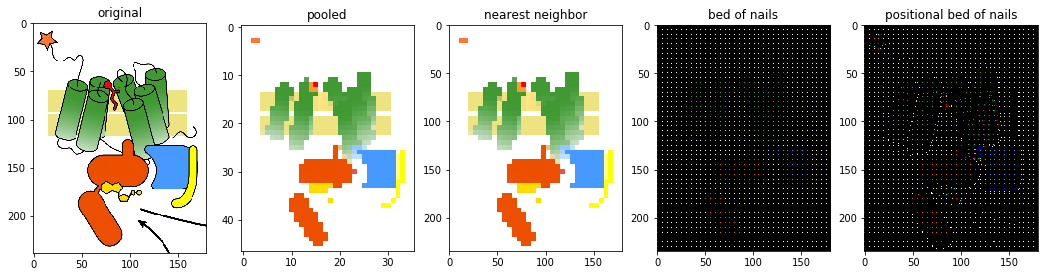

In [6]:
pool_uppool(5)

**Notice: padding is lost if the divisions do not result in whole numbers**

### Transpose convolution

In [7]:
def trans_conv(data,kernels):
    # get input data
    n,k,_,ch = kernels.shape
    x,y,_ = data.shape
    # create output array
    trans = np.zeros([x+k-1,y+k-1,ch])
    # populate array
    for kernel in range(n):
        for i in range(x):
            for j in range(y):
                trans[i:i+k,j:j+k]+= data[i,j,kernel]*kernels[kernel]
    # return
    return trans

In [10]:
def conv_trans(kernel_size,n_kernels):
    # original image
    print(image.shape)

    conv = Conv2D(n_kernels,3,kernel_size)
    conv.initialize_weights()

    convolved = conv.feed_forward(image)
    # convolved image
    print(convolved.shape)

    trans = trans_conv(convolved,conv.kernels)
    # after transpose convolution
    print(trans.shape)

    fig,axes = plt.subplots(ncols=3, figsize=(14,14))

    axes[0].imshow(image)
    axes[0].set_title('original')
    axes[1].imshow(convolved[:,:,0],cmap='gray')
    axes[1].set_title('convolved')
    axes[2].imshow(trans)
    axes[2].set_title('transpose convolution')

    plt.show()

(239, 180, 3)
(237, 178, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(239, 180, 3)


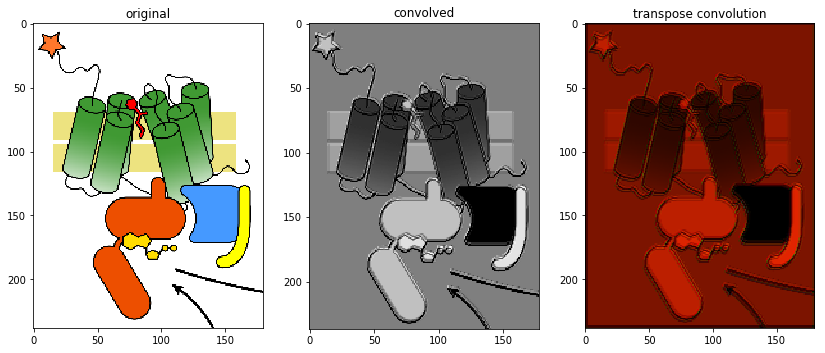

In [13]:
conv_trans(3,2)

**Notice: Once again, padding may be lost**
<br>
**Note: the kernels for the transpose convolution can be learnt to provide more sensible output (here they are randomized)**

(239, 180, 3)
(217, 158, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(239, 180, 3)


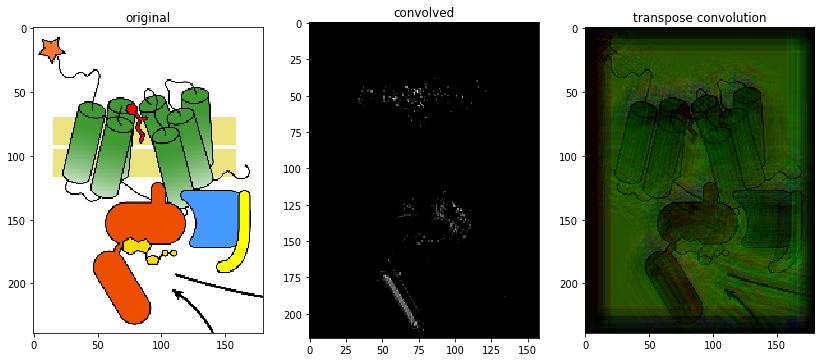

In [15]:
conv_trans(23,6)